In [60]:
import cv2
import os
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [8]:
# calculate the BGR mean for each swatch
path = '/home/yafen/insight_project/Demos/img_swatch'
colors = []
for i in os.listdir(path):
    product_id = i.split('.')[0].strip()
    img_file = os.path.join(path,i)
    image = cv2.imread(img_file)
    bgr_mean = cv2.mean(image)[:3]
    colors.append({'product_id': product_id,
                        'bgr_mean': bgr_mean})
df_color = pd.DataFrame(colors)

In [3]:
cv2.mean(cv2.imread('/home/yafen/insight_project/Demos/img_swatch/2309946.jpg'))

(77.64583333333333, 79.39814814814814, 142.07407407407408, 0.0)

In [9]:
df_color.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  504 non-null    object
 1   bgr_mean    504 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [10]:
# read lipsticks.csv into dataframe
df_sephora = pd.read_csv('lipsticks.csv')
# df_ysl['product_id'] = df_ysl.product_id.astype('object')
# convert product_id column in df_color from obj to int, in order to merge
df_color.product_id = df_color.product_id.astype(int)

In [12]:
# merge df_sephora and df_color on product_id column
df_bgr = df_sephora.merge(df_color,on='product_id')
df_bgr

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean
0,2352243,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,red bright,"(18.608024691358025, 12.409722222222221, 203.8..."
1,2352250,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,coral bright,"(74.47222222222221, 70.15277777777777, 217.474..."
2,2352268,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9..."
3,2352276,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,nude beige,"(105.23842592592592, 103.57175925925925, 213.7..."
4,2352284,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68..."
...,...,...,...,...,...,...,...,...,...,...
497,1860147,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,10 Clove Pop,brown neutral chocolate,"(74.94753086419753, 71.4074074074074, 155.2685..."
498,1860154,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,11 Peppermint Pop,blue red bright,"(93.79012345679011, 60.51466049382716, 224.746..."
499,1860162,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,12 Coral Pop,peach pinky mid-tone,"(107.72453703703704, 75.99074074074073, 240.86..."
500,1860170,CLINIQUE,Matte finish,$19.50,https://www.sephora.com/product/pop-matte-lip-...,https://www.sephora.com/productimages/sku/s186...,https://www.sephora.com/productimages/sku/s186...,13 Peony Pop,pink light,"(152.45679012345678, 127.84259259259258, 238.1..."


In [13]:
df_bgr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       502 non-null    int64 
 1   brand            502 non-null    object
 2   looks            502 non-null    object
 3   price            502 non-null    object
 4   product_url      502 non-null    object
 5   product_img_url  502 non-null    object
 6   color_img_url    502 non-null    object
 7   color_code       502 non-null    object
 8   color            502 non-null    object
 9   bgr_mean         502 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.1+ KB


In [14]:
# save the merged dataframe df_bgr to a csv file
df_bgr.to_csv('lipsticks_bgr.csv',index=False)

In [17]:
# Python connect to posgresql
user = 'yafen' #add your Postgres username here
host = 'localhost'
dbname = 'p_demo'
pswd = '112358'
db = create_engine('postgres://%s:%s@%s/%s'%(user,pswd,host,dbname))
# query the lipsticks_bgr_table and read into a dataframe
query = "SELECT * FROM lipsticks_bgr_table;"
df_bgrmean = pd.read_sql_query(query,db)
df_bgrmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_id       502 non-null    int64 
 1   brand            502 non-null    object
 2   looks            502 non-null    object
 3   price            502 non-null    object
 4   product_url      502 non-null    object
 5   product_img_url  502 non-null    object
 6   color_img_url    502 non-null    object
 7   color_code       502 non-null    object
 8   color            502 non-null    object
 9   bgr_mean         502 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.3+ KB


In [18]:
# convert the bgr mean values tuples to float32 since the KMeans input need to be float32
Z = []
for i in range(df_bgrmean.shape[0]):
    Z.append([float(e) for e in df_bgrmean.bgr_mean[i].strip('()').split(',')])
Z = np.array(Z,dtype='float32')
Z

array([[ 18.608025,  12.409722, 203.81018 ],
       [ 74.47222 ,  70.15278 , 217.47453 ],
       [ 60.27932 ,  28.57716 , 193.91975 ],
       ...,
       [107.72454 ,  75.99074 , 240.86806 ],
       [152.45679 , 127.84259 , 238.17516 ],
       [ 75.953705,  48.373455, 143.29013 ]], dtype=float32)

In [85]:
sum_square_dist = []
K = np.arange(1,50,2)
for k in K:
    kmeans = KMeans(n_clusters=k)
    sum_square_dist.append(kmeans.fit(Z).inertia_)
sum_square_dist = np.array(sum_square_dist)

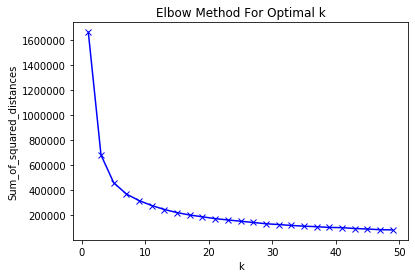

In [86]:
plt.plot(K, sum_square_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [87]:
kmeans = KMeans(n_clusters=17).fit(Z)
x = np.split(Z,3,axis=1)[0].flatten()
y = np.split(Z,3,axis=1)[1].flatten()
z = np.split(Z,3,axis=1)[2].flatten()
cluster = kmeans.labels_
centers = kmeans.cluster_centers_

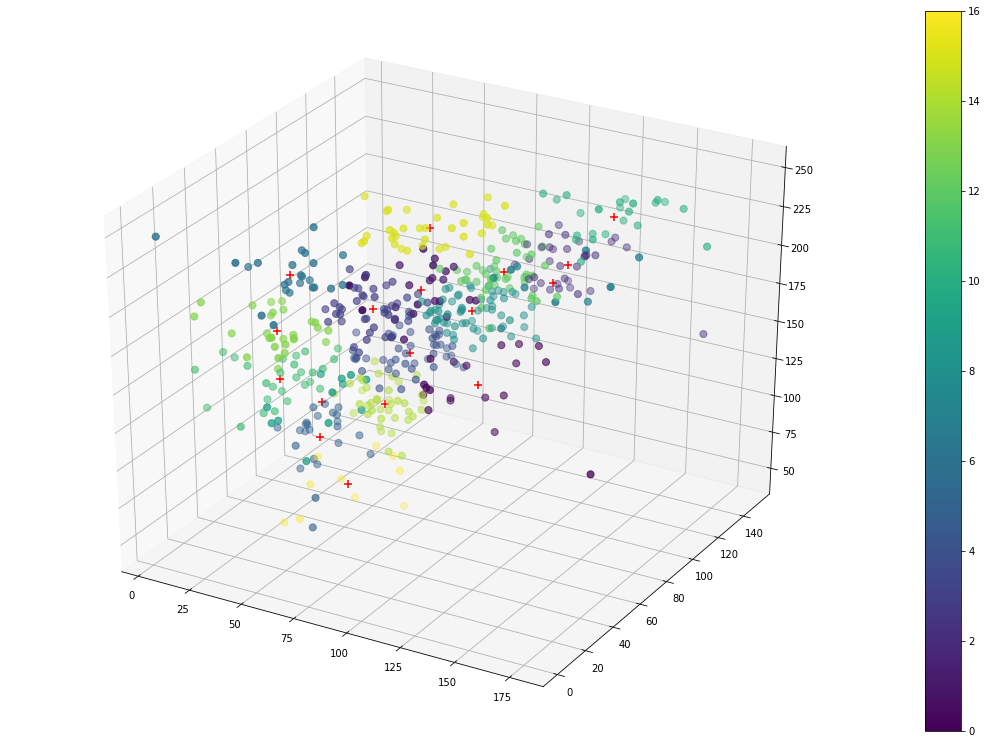

In [93]:
fig = plt.figure(figsize=(15,10))
ax = Axes3D(fig)
scatter = ax.scatter(x,y,z,c=cluster,s=50)
for i,j,k in centers:
    ax.scatter(i,j,k,s=50,c='r',marker='+')
plt.colorbar(scatter)

In [89]:
df_bgrmean['color_label'] = kmeans.labels_
df_bgrmean.head()

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean,color_label
0,2352243,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,red bright,"(18.608024691358025, 12.409722222222221, 203.8...",13
1,2352250,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,coral bright,"(74.47222222222221, 70.15277777777777, 217.474...",15
2,2352268,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9...",13
3,2352276,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,nude beige,"(105.23842592592592, 103.57175925925925, 213.7...",12
4,2352284,Yves Saint Laurent,Matte finish,$37.00,https://www.sephora.com/product/yves-saint-lau...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68...",13


In [90]:
label = kmeans.predict(np.reshape(np.array([28.01298701298701, 51.099567099567096, 222.42943722943724],dtype='float32'),(1,-1)))

In [92]:
df_bgrmean[df_bgrmean['color_label'] == label[0]]

,product_id,brand,looks,price,product_url,product_img_url,color_img_url,color_code,color,bgr_mean,color_label
33,1965425,NARS,Matte finish,$26.00,https://www.sephora.com/product/powermatte-lip...,https://www.sephora.com/productimages/sku/s196...,https://www.sephora.com/productimages/sku/s196...,Don't Stop,geranium,"(60.257716049382715, 47.513888888888886, 224.5...",6
61,2359263,Yves Saint Laurent,High Shine finish,$38.00,https://www.sephora.com/product/rouge-volupte-...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,110 Red Is My Savior,red bright,"(46.358024691358025, 39.10648148148148, 212.79...",6
65,2310126,Gucci,Matte finish,$42.00,https://www.sephora.com/product/gucci-gucci-ro...,https://www.sephora.com/productimages/sku/s231...,https://www.sephora.com/productimages/sku/s231...,25* Goldie Red,matte the red gucci,"(52.036265432098766, 38.85570987654321, 206.84...",6
98,1875301,Armani Beauty,Matte finish,$38.00,https://www.sephora.com/product/lip-magnet-liq...,https://www.sephora.com/productimages/sku/s187...,https://www.sephora.com/productimages/sku/s187...,302 HOLLYWOOD,coral red,"(23.62577160493827, 36.317129629629626, 212.56...",6
116,2104347,Armani Beauty,Matte finish,$38.00,https://www.sephora.com/product/rouge-d-armani...,https://www.sephora.com/productimages/sku/s210...,https://www.sephora.com/productimages/sku/s210...,402 Red-to-go,tangerine,"(50.797839506172835, 36.08101851851852, 230.18...",6
146,1293521,Yves Saint Laurent,Satin finish,$38.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s129...,https://www.sephora.com/productimages/sku/s129...,13 Le Orange,orange bright,"(43.29012345679012, 42.729166666666664, 204.44...",6
165,2359222,Yves Saint Laurent,Satin finish,$38.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s235...,https://www.sephora.com/productimages/sku/s235...,110 Red Is My Savior,red bright,"(42.01311728395061, 37.550925925925924, 201.18...",6
168,2341493,Yves Saint Laurent,Matte finish,$39.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s234...,https://www.sephora.com/productimages/sku/s234...,26 Rouge Mirage,orange red,"(56.92438271604938, 32.888888888888886, 227.78...",6
169,2129898,Yves Saint Laurent,Matte finish,$39.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s212...,https://www.sephora.com/productimages/sku/s212...,1 Rouge Extravagant,red bright,"(52.79938271604938, 4.689814814814815, 211.641...",6
170,2129906,Yves Saint Laurent,Matte finish,$39.00,https://www.sephora.com/product/rouge-pur-cout...,https://www.sephora.com/productimages/sku/s212...,https://www.sephora.com/productimages/sku/s212...,2 Strange Orange,tangerine,"(4.540895061728395, 4.5246913580246915, 245.79...",6


In [37]:
kmeans.labels_

array([3, 4, 3, 4, 3, 2, 3, 1, 0, 2, 2, 0], dtype=int32)

In [3]:
df_ysl = pd.read_csv('ysl.csv')
df_ysl

,product_id,brand,looks,color_img_url,color_code,color,rgb_mean
0,2352243,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N201 Rouge Tatouage,bright red,"(18.608024691358025, 12.409722222222221, 203.8..."
1,2352250,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N202 Coral Symbol,bright coral,"(74.47222222222221, 70.15277777777777, 217.474..."
2,2352268,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N203 Rose Dissident,fuschia,"(60.279320987654316, 28.577160493827158, 193.9..."
3,2352276,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N204 Beige Underground,beige nude,"(105.23842592592592, 103.57175925925925, 213.7..."
4,2352284,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N205 Rouge Clique,blue red,"(46.44753086419753, 17.705246913580247, 186.68..."
5,2352292,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N206 Club Bordeaux,burgundy,"(11.412808641975309, 23.233024691358022, 125.6..."
6,2352318,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N208 Rouge Faction,deep red,"(54.695216049382715, 16.787037037037035, 185.8..."
7,2352326,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N209 Anti-Social Prune,plum,"(55.61111111111111, 20.53858024691358, 117.896..."
8,2352334,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N210 Nude Sedition,brown nude,"(82.78317901234567, 79.92283950617283, 162.152..."
9,2352342,Yves Saint Laurent,Tatouage Couture Velvet Cream Liquid Lipstick,https://www.sephora.com/productimages/sku/s235...,N211 Chili Incitement,deep chili red,"(13.345679012345679, 32.189043209876544, 156.8..."


In [28]:
l = df_ysl.rgb_mean.map(lambda x: np.array([df_ysl.rgb_mean.values[x].strip('()').split(',') ],dtype='float32'))

In [30]:
l

0     [[18.608025, 12.409722, 203.81018], [74.47222,...
1     [[18.608025, 12.409722, 203.81018], [74.47222,...
2     [[18.608025, 12.409722, 203.81018], [74.47222,...
3     [[18.608025, 12.409722, 203.81018], [74.47222,...
4     [[18.608025, 12.409722, 203.81018], [74.47222,...
5     [[18.608025, 12.409722, 203.81018], [74.47222,...
6     [[18.608025, 12.409722, 203.81018], [74.47222,...
7     [[18.608025, 12.409722, 203.81018], [74.47222,...
8     [[18.608025, 12.409722, 203.81018], [74.47222,...
9     [[18.608025, 12.409722, 203.81018], [74.47222,...
10    [[18.608025, 12.409722, 203.81018], [74.47222,...
11    [[18.608025, 12.409722, 203.81018], [74.47222,...
Name: rgb_mean, dtype: object

In [31]:
l1 = []
for i in range(df_ysl.shape[0]):
    l1.append([float(e) for e in df_ysl.rgb_mean[i].strip('()').split(',')])
l1

[[18.608024691358025, 12.409722222222221, 203.81018518518516],
 [74.47222222222221, 70.15277777777777, 217.47453703703704],
 [60.279320987654316, 28.577160493827158, 193.91975308641975],
 [105.23842592592592, 103.57175925925925, 213.78703703703704],
 [46.44753086419753, 17.705246913580247, 186.68827160493825],
 [11.412808641975309, 23.233024691358022, 125.69212962962962],
 [54.695216049382715, 16.787037037037035, 185.87345679012344],
 [55.61111111111111, 20.53858024691358, 117.8966049382716],
 [82.78317901234567, 79.92283950617283, 162.15277777777777],
 [13.345679012345679, 32.189043209876544, 156.87654320987653],
 [10.501543209876543, 17.686728395061728, 154.1489197530864],
 [83.93672839506172, 69.27314814814814, 179.53935185185185]]

In [32]:
np.array(l1)

array([[ 18.60802469,  12.40972222, 203.81018519],
       [ 74.47222222,  70.15277778, 217.47453704],
       [ 60.27932099,  28.57716049, 193.91975309],
       [105.23842593, 103.57175926, 213.78703704],
       [ 46.44753086,  17.70524691, 186.6882716 ],
       [ 11.41280864,  23.23302469, 125.69212963],
       [ 54.69521605,  16.78703704, 185.87345679],
       [ 55.61111111,  20.53858025, 117.89660494],
       [ 82.78317901,  79.92283951, 162.15277778],
       [ 13.34567901,  32.18904321, 156.87654321],
       [ 10.50154321,  17.6867284 , 154.14891975],
       [ 83.9367284 ,  69.27314815, 179.53935185]])